In this exercise you will apply what you learned in the lecture to experiment with a working Linear Regression model. The model will be very similar to the one discussed in the lecture. You will run the Jupyter Notebook cells below, to create the model, train the model, and test the output

In [1]:
# cell 1
# notebook version 1.2

import os

import numpy as np
import tensorflow as tf

# A special command for IPython Notebooks that
# intructs Matplotlib to display plots in the notebook

%pylab inline
print ('cell finished')

C:\Users\ktnng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Populating the interactive namespace from numpy and matplotlib
cell finished


This cell defines variables PERSQFT and BASE that will be used to generate the test data. Variable PERSQFT is the cost per house square foot divided by 1000. Variable BASE helps with tiny houses so that the price doesn't go to 0 for a very small house. (Notice that the price per sq ft is based on a cheap house in California)

Variables PERSQFT and BASE will be the values that the model tries to learn. Here we are using them to generate the training data so that we can see if the model can learn those values.

Defining them in a separate cell allows you to easily change the values. You can experiment with the learning rate and number of EPOCHS to see if it makes a difference during training

In [61]:
# cell 2

tf.reset_default_graph()
sess = tf.Session()

PERSQFT = .4   # $400 per sq ft
BASE = .35     # $350K base price 

LEARNING_RATE = .01
EPOCHS = 3000
ITEMS = 100

print ('cell finished')

cell finished


This cell uses the constants from the cell above with a standard python function to create the training data as shown in the lecture.

In [62]:
#cell 3

def make_noisy_data(w=PERSQFT, b=BASE, n=ITEMS):
    sqft = np.random.rand(n).astype(np.float32) * 6 # multiply by 6 for max sq ft of 6000
    noise = np.random.normal(scale=0.08, size=len(sqft))
    price = w * sqft + b + noise
    return sqft, price

print ('cell finished')

cell finished


This cell calls the make_noisy_data function and assigns the outputs to two variables sqft_train and price_train. Variable sqft_train will be the x values fed into your linear regression model and price_train will be the expected output.

In [63]:
# cell 4

sqft_train, price_train = make_noisy_data()


print ('cell finished')

cell finished


This cell plots our training data so that we can get an idea of its general distribution. It is a linear distribution with a bit of noise.

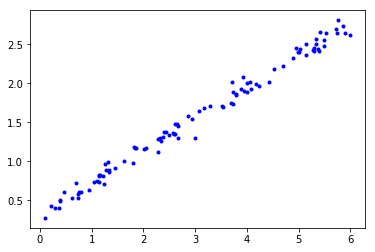

In [64]:
# cell 5

# Run this cell to plot the data.

pylab.plot(sqft_train, price_train, 'b.')


Variables w and b represent the two values that we will try to learn from our training data. They will be initialized to 0 and successively updated as the training process proceeds. At the end of the training these values should approximate the per sq ft price and the base used to create the training data. 

In [65]:
# cell 6

x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32)
y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32)

print ('cell finished')

cell finished


Let's see what happens when we print the two placeholders. Do they have any values yet?

In [66]:
# cell 7

print(x_placeholder)
print(y_placeholder)

print ('cell finished')

Tensor("Placeholder:0", shape=(?,), dtype=float32)
Tensor("Placeholder_1:0", shape=(?,), dtype=float32)
cell finished


In the next cell will be defined the variables that will learn the values of price per sq ft and the base price. These two variables will not be initialized to the correct values, but will learn the correct values from the training data and training process. 

These variables start out at a random value based on the TensorFlow random normal distribution as discussed in the lecture. 

In [67]:
# cell 8

w = tf.Variable(tf.random_normal([1]), name='w')
b = tf.Variable(tf.random_normal([1]), name='b')
# This is the same as y = tf.add(tf.mul(w, x_placeholder), b), but looks nicer
y = w * x_placeholder + b

print ('cell finished')

cell finished


Just for fun what happens when we print out the value of w, b, and y. Do you think they will have random values?

In [68]:
# cell 9

print(w)
print(b)
print(y)

print ('cell finished')

<tf.Variable 'w:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'b:0' shape=(1,) dtype=float32_ref>
Tensor("add:0", shape=(?,), dtype=float32)
cell finished


The variables do not have values until they are initialized as discussed in the lecture. 

Next let's define the loss and the optimizer so that we can train the model. The loss will be squared error and we will use the standard gradient descent optimizer discussed in the lecture.

In [69]:
# cell 10

loss = tf.reduce_mean(tf.square(y - y_placeholder))

optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
train = optimizer.minimize(loss)

print ('cell finished')

cell finished


Again let's print out the values of the loss, optimizer and the training step. Are the values expected?

In [70]:
# cell 11

print("loss:", loss)
print("optimizer:", optimizer)
print("train_step:", train)

print ('cell finished')

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x000001B460242940>
train_step: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_w/ApplyGradientDescent"
input: "^GradientDescent/update_b/ApplyGradientDescent"

cell finished


Remember that TensorFlow requires variables to be initialized, so the easiest is to run the global initializer for all variables

In [71]:
# cell 12

sess.run(tf.global_variables_initializer())
# initalizes all the variables

print ('cell finished')

cell finished


Let's test the model before training to see how bad it is. Any guesses as to how bad it will be? Since w and b are random there is a chance (albeit small) that the values could be close to correct, but normally it's pretty terrible. 

In [72]:
# cell 13

test_sqft = 4
expPrice = test_sqft * PERSQFT + BASE

wval,bval = sess.run([w,b])

outval = wval * test_sqft + bval
print ("price should be [{}] but is {}".format(expPrice,outval))

price should be [1.9500000000000002] but is [-3.2562413]


This cell defines the training loop. It will use the number of EPOCHS specified in the cell near the top to determine how many iterations to train. Each training iteration will update the values of w and b based on the loss calculated by the optimizer. Every 20 steps it will print the current values of w and b so that we can see the progress. The added value of this is that we can see when the values start to stabilize and determine whether our learning rate and number of epochs are too small or too large.

In [73]:
# cell 14

for step in range(EPOCHS):

    # - train will use the optimizer to adjust our variables to reduce loss
    result = sess.run([train],feed_dict={x_placeholder: sqft_train, y_placeholder: price_train})

    if step % 20 == 0:
        wt, bt = sess.run([w,b])
        print('step = {} w = {} b = {}'.format( step, wt, bt))


print ('cell finished')

step = 0 w = [-0.5556735] b = [0.3137017]
step = 20 w = [0.35512486] b = [0.52374786]
step = 40 w = [0.36186573] b = [0.5067163]
step = 60 w = [0.36592957] b = [0.49069208]
step = 80 w = [0.3696227] b = [0.47610775]
step = 100 w = [0.37298363] b = [0.4628351]
step = 120 w = [0.3760423] b = [0.45075622]
step = 140 w = [0.3788259] b = [0.4397636]
step = 160 w = [0.38135916] b = [0.4297597]
step = 180 w = [0.38366458] b = [0.42065546]
step = 200 w = [0.38576263] b = [0.41237012]
step = 220 w = [0.38767198] b = [0.4048299]
step = 240 w = [0.38940966] b = [0.3979678]
step = 260 w = [0.390991] b = [0.39172286]
step = 280 w = [0.3924302] b = [0.3860396]
step = 300 w = [0.39373985] b = [0.3808675]
step = 320 w = [0.39493176] b = [0.3761606]
step = 340 w = [0.39601648] b = [0.371877]
step = 360 w = [0.39700362] b = [0.3679787]
step = 380 w = [0.39790198] b = [0.36443102]
step = 400 w = [0.39871955] b = [0.36120236]
step = 420 w = [0.3994636] b = [0.35826415]
step = 440 w = [0.4001407] b = [0.35

This cell simply prints out the values of our trainable values for price per sq ft and base price. Notice that we need to run the session to retrieve the values. However the session is not really run once more but cached values are retrieved. 

In [74]:
# cell 15

wval = sess.run(w)
bval = sess.run(b)

print('per sq ft = {}'.format(wval*1000))
print('base price = {}'.format(bval*1000))

per sq ft = [406.99146]
base price = [328.53595]


Now that the training has run we can plot the values for w and b and see how closely they matched the training data. Ideally the line should bisect the training data. What would be reasons that it did not?

w: 0.406991, b: 0.328536


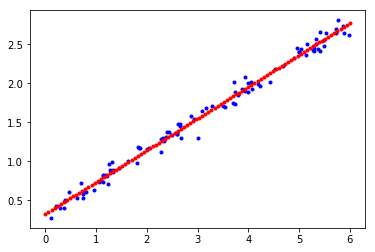

In [75]:
# cell 16

print ("w: %f, b: %f" % (wval, bval))
pylab.plot(sqft_train, price_train, 'b.')
x = np.linspace(0,6,100)
y = x * wval + bval
pylab.plot(x,y, 'r.')

As you can see the line fits the data pretty well with the default parameters for EPOCHS and LEARNING_RATE. Are those optimal values? Can you get just as good results with different values?

Also experiment with the price per sq ft and base price to make sure the model can still learn the values

**IMPORTANT: When you are finished make sure you go to the Jupyter notebook “File” menu above and select “Close and halt”. This will shutdown this notebook and take you back to the Jupyter Notebook Home tab.**